<a href="https://colab.research.google.com/github/bala-baskar/aiml_tech_courses/blob/main/pytorch/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [5]:
# Check for GPU
!nvidia-smi

Wed Feb 19 17:25:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.5.1+cu124


'cuda'

https://poloclub.github.io/cnn-explainer/

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
import os
path = './pytorch/practice/data'
if not os.path.isdir(path):
  os.makedirs(path)

In [8]:
from torchvision import datasets, transforms

train_data = datasets.FashionMNIST(root=path,
                                   train=True,
                                   download=True,
                                   transform=transforms.ToTensor())

test_data = datasets.FashionMNIST(root=path,
                                   train=False,
                                   download=True,
                                   transform=transforms.ToTensor())

In [9]:
train_data.data.shape, test_data.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [10]:
train_data.targets, test_data.targets

(tensor([9, 0, 0,  ..., 3, 0, 5]), tensor([9, 2, 1,  ..., 8, 1, 5]))

In [58]:
# Get the classes, class_idx
class_names = train_data.classes
print(class_names)
print(train_data.class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [12]:
# See first training sample
image, label = train_data[0]
print(image.shape) # [C,H,W] C = 1 as it is grey image
print(label)
image

torch.Size([1, 28, 28])
9


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

## 6. Visualize at least 5 different samples of the MNIST training dataset.

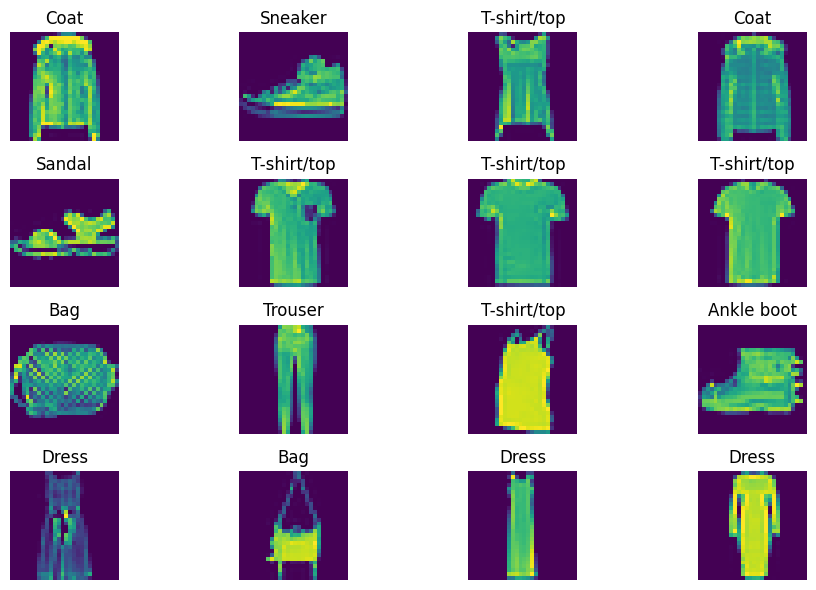

In [13]:
import matplotlib.pyplot as plt
import random
nrows, ncols = 4,4
fig, ax = plt.subplots(nrows,ncols,figsize=(10,6))

for row in range(nrows):
  for col in range(ncols):
    idx = random.randint(0,train_data.data.shape[0])
    ax[row][col].imshow(train_data.data[idx])
    ax[row][col].axis('off')
    ax[row][col].set_title(train_data.classes[train_data.targets[idx].item()])


plt.tight_layout()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,BATCH_SIZE)
len(train_dataloader), len(test_dataloader) # this gives number of batches - here 60k train images/batch_size (32)  (60000/32 = 1875)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [15]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
                          nn.Conv2d(in_channels=input_shape,
                                    out_channels=hidden_units,
                                    kernel_size=(3,3),
                                    stride=1,
                                    padding=0),
                          nn.ReLU(),
                          nn.Conv2d(in_channels=hidden_units,
                                    out_channels=hidden_units,
                                    kernel_size=(3,3),
                                    stride=1,
                                    padding=0),
                          nn.ReLU(),
                          nn.MaxPool2d(kernel_size=2))
    self.conv_block_2 = nn.Sequential(
                          nn.Conv2d(in_channels=hidden_units,
                                    out_channels=hidden_units,
                                    kernel_size=(3,3),
                                    stride=1,
                                    padding=0),
                          nn.ReLU(),
                          nn.Conv2d(in_channels=hidden_units,
                                    out_channels=hidden_units,
                                    kernel_size=(3,3),
                                    stride=1,
                                    padding=0),
                          nn.ReLU(),
                          nn.MaxPool2d(kernel_size=2))
    self.classifier = nn.Sequential(
                        nn.Flatten(),
                        nn.Linear(in_features=hidden_units*4*4,
                                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    return self.classifier(x)

In [21]:
model = TinyVGG(input_shape=1,
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [18]:
# Forward pass to check the calculation is correct
model(image.unsqueeze(dim=0).to(device))

tensor([[ 0.0133, -0.0130,  0.0376,  0.1053, -0.0324,  0.0024, -0.0413, -0.0153,
         -0.0702,  0.0277]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(),lr=0.01)

In [23]:
EPOCHS = 10
for epoch in range(EPOCHS):
  #Train the model
  model.train()
  train_loss = 0
  for X_batch, y_batch in train_dataloader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    y_pred_train = model(X_batch)
    tr_loss = loss_fn(y_pred_train,y_batch)
    optimiser.zero_grad()
    tr_loss.backward()
    optimiser.step()
    train_loss += tr_loss

  if epoch % 1 == 0:
    print(f"Epoch {epoch}/{EPOCHS}, Train loss: {train_loss}")

Epoch 0/10, Train loss: 3269.944580078125
Epoch 1/10, Train loss: 1324.782958984375
Epoch 2/10, Train loss: 1057.606689453125
Epoch 3/10, Train loss: 944.7733154296875
Epoch 4/10, Train loss: 869.76953125
Epoch 5/10, Train loss: 821.61279296875
Epoch 6/10, Train loss: 783.4571533203125
Epoch 7/10, Train loss: 755.92236328125
Epoch 8/10, Train loss: 730.9812622070312
Epoch 9/10, Train loss: 712.2692260742188


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [24]:
model(image.unsqueeze(dim=0).to(device))

tensor([[ -5.7016, -11.5903,  -4.2153,  -1.4326,  -2.9524,   6.2975,   0.1802,
           7.3518,   3.1446,  15.5316]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [28]:
torch.softmax(model(image.unsqueeze(dim=0).to(device)),dim=1).argmax().item()

9

In [47]:
#Model prediction
test_size, correct_pred = 0,0
model.eval()
with torch.no_grad():
  for X_batch,y_batch in test_dataloader:
    X_batch,y_batch = X_batch.to(device), y_batch.to(device)
    y_pred_test = model(X_batch)
    y_pred_class = torch.softmax(y_pred_test,dim=1).argmax(dim=1)
    test_size += X_batch.size(0)
    correct_pred += (y_pred_class == y_batch).sum().item()

print(f"Model performance on test set {round((correct_pred/test_size)*100.0,2)}%")

Model performance on test set 85.26%


In [46]:
torch.softmax(y_pred_test,dim=1).argmax(dim=1)

tensor([3, 0, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')

In [41]:
y_pred_class, y_batch

(tensor(35, device='cuda:0'),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0'))

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [49]:
test_batch = iter(test_dataloader)
test_image, test_labels = next(test_batch)
print(test_image.shape, test_labels.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [50]:
model.eval()
with torch.no_grad():
  y_pred_test = model(test_image.to(device))
  y_pred_cls = torch.softmax(y_pred_test,dim=1).argmax(dim=1)

In [57]:
y_pred_array = y_pred_cls.to("cpu").detach().numpy()
print(f"Prediction array for first batch {y_pred_array}")
test_label_array = test_labels.to("cpu").detach().numpy()
print(f"Ground truth array for first batch {test_label_array}")

Prediction array for first batch [9 2 1 1 6 1 4 4 5 7 4 5 5 3 4 1 2 4 8 0 2 7 7 5 1 2 6 0 9 4 8 8]
Ground truth array for first batch [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8]


In [59]:
import pandas as pd
pd.crosstab(test_label_array,y_pred_array)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0
4,0,0,1,0,4,0,0,0,0,0
5,0,0,0,0,0,2,0,1,0,0
6,0,0,0,0,1,0,2,0,0,0
7,0,0,0,0,0,1,0,2,0,0
8,0,0,0,0,0,0,0,0,3,0


### Use torchmetrics to get Confusion Matrix
```python
!pip install -q torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);
```

In [75]:
# Misclassified images in first batch
images, labels, pred = [],[],[]
for idx in range(len(test_label_array)):
  if test_label_array[idx] != y_pred_array[idx]:
    images.append(test_image[idx])
    labels.append(class_names[test_label_array[idx]])
    pred.append(class_names[y_pred_array[idx]])
get_error_images = dict({'image':images,'label':labels,'prediction':pred})

In [71]:
len(test_label_array)

32

In [74]:
len(get_error_images['image'])

6

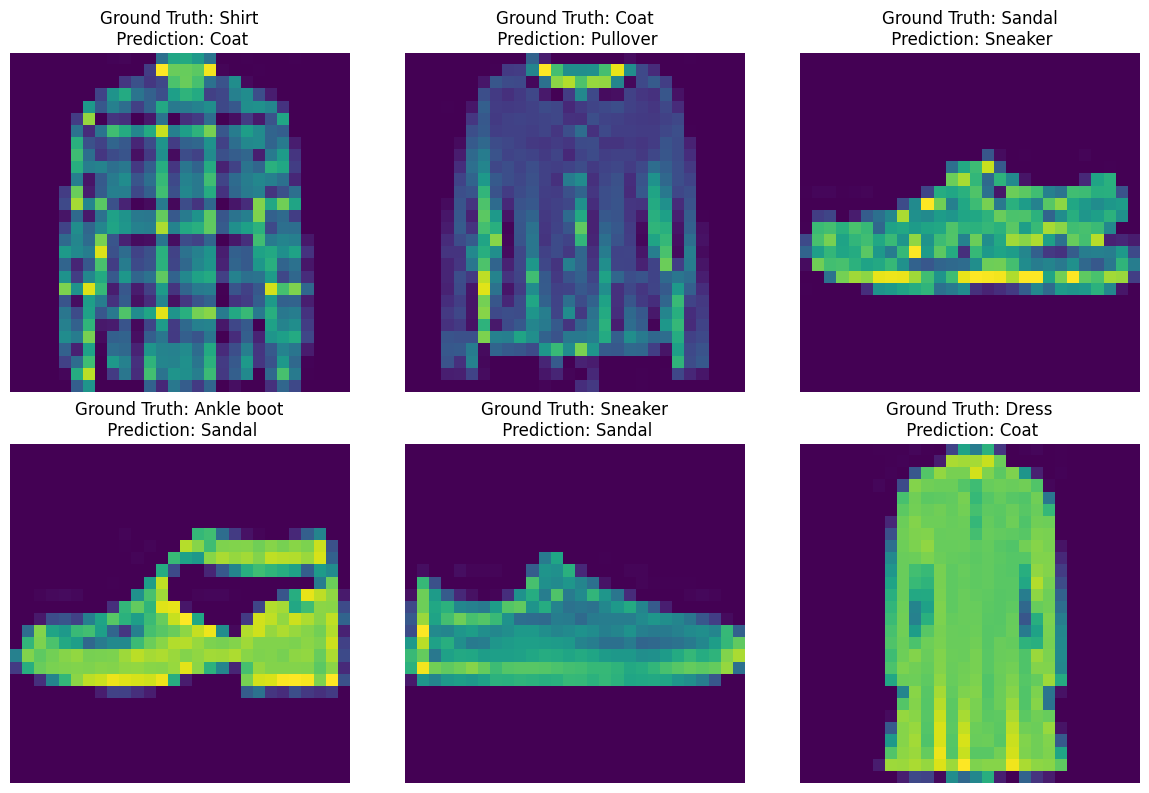

In [101]:
n_rows, n_cols = 2,3
fig, ax = plt.subplots(n_rows, n_cols,figsize=(12,8))
for count in range(len(get_error_images['image'])):
  fig_row, fig_col = count % n_rows, count % n_cols
  ax[fig_row][fig_col].imshow(get_error_images['image'][count].squeeze())
  ax[fig_row][fig_col].set_title(f"Ground Truth: {get_error_images['label'][count]}\n Prediction: {get_error_images['prediction'][count]}")
  ax[fig_row][fig_col].axis('off')
plt.tight_layout()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [118]:
random_img = torch.randn(1,3,64,64)
print(random_img.shape)
kernel_sizes, output_sizes = [], []
for k in range(2,16,1):
  conv_layer = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=k,
                        padding=1,
                        stride=1)
  image_after_conv = conv_layer(random_img)
  # print(conv_layer)
  # print(conv_layer(random_img).shape)
  kernel_sizes.append(k)
  output_sizes.append(image_after_conv.shape[-1])

torch.Size([1, 3, 64, 64])


Text(0.5, 1.0, 'Plot: Kernel size vs Output image shape')

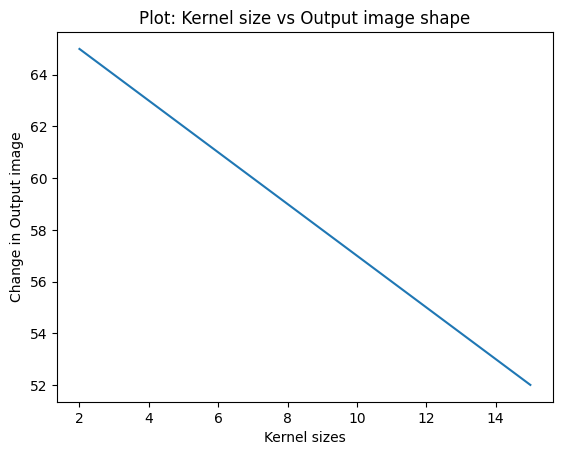

In [122]:
import seaborn as sns
sns.lineplot(x=kernel_sizes,y=output_sizes)
plt.xlabel("Kernel sizes")
plt.ylabel("Change in Output image")
plt.title("Plot: Kernel size vs Output image shape")